In [45]:
import numpy as np

import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Dense 
from keras.layers import Input, Dense
from keras import backend as K
from keras.models import load_model

##plot and visualize the data against time and observe how the feb 14-21 data is different from the rest of the data   

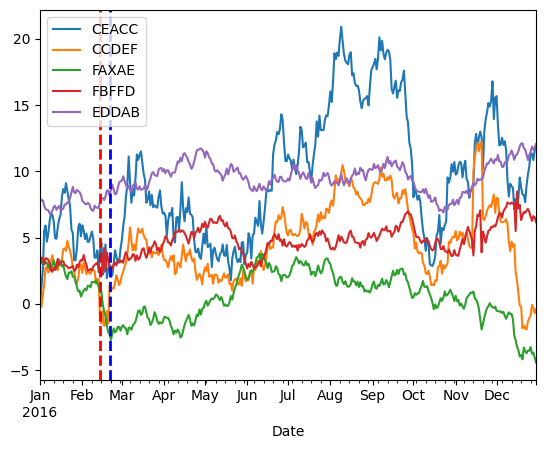

In [46]:
import matplotlib.pyplot as plt
df=pd.read_csv('anomaly_detection2.csv',parse_dates=['Date'])
# df_new=df.drop(['Date'],axis=1)
# df_new.plot()
df.set_index('Date',inplace=True)
df.plot()
plt.axvline(pd.to_datetime('2016-02-14'), color='r', linestyle='--', linewidth=2, label='Event 1')
plt.axvline(pd.to_datetime('2016-02-21'), color='b', linestyle='--', linewidth=2, label='Event 2')
plt.show()

In [47]:

import plotly.express as px
px.line(df,x=df.index,y=['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB'])


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CEACC<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CEACC',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CEACC',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        ,  1.23225977,  2.54012919, ..., 10.84136698, 11.58593208,
                          11.99195242]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=CCDEF<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CCDEF',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CCDEF',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        , -0.21730517,  0.60670884, ..., -0.31712651, -0.71042634,
                          -0.39958795]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FAXAE<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FAXAE',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FAXAE',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 3.        ,  3.19378003,  3.18095   , ..., -3.68039695, -4.04611568,
                          -4.43606537]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FBFFD<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FBFFD',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FBFFD',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2016, 12, 28, 0, 0),
                          datetime.datetime(2016, 12, 29, 0, 0),
                          datetime.datetime(2016, 12, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([3.        , 3.48999178, 3.46481115, ..., 6.61749071, 6.51904081,
                          6.15513884]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=EDDAB<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'EDDAB',
    

In [48]:
##Training data is between (01/01/2016 to 09/30/2016) and test period: (10/01/2016 to 12/30/2016)
train_df = df.loc['2016-03-01':'2016-07-30']
val_df=df.loc['2016-08-01':'2016-09-30']
anom_test_df=df.loc['2016-02-10':'2016-02-26']
norm_test_df = df.loc['2016-01-01':'2016-01-30']
train_df.head(5)

test_df=df.loc['2016-10-01':'2016-12-30']


In [49]:
##create sequences out of time series data
def create_seq_data(data,seq_len):
    seq_data=[]
    for i in range(len(data)-seq_len):
        seq_data.append(data[i:i+seq_len])
    return np.array(seq_data)

In [50]:
seq_len=3
X_train=create_seq_data(train_df,seq_len)
X_val=create_seq_data(val_df,seq_len)
X_norm_test=create_seq_data(norm_test_df,seq_len)
X_anom_test=create_seq_data(anom_test_df,seq_len)

X_test=create_seq_data(test_df,seq_len)


X_train=X_train.reshape(-1,seq_len,train_df.shape[1])
# X_train=np.delete(X_train,[0,1],2).astype(float)
X_val=X_val.reshape(-1,seq_len,val_df.shape[1])
X_norm_test=X_norm_test.reshape(-1,seq_len,norm_test_df.shape[1])
X_anom_test=X_anom_test.reshape(-1,seq_len,anom_test_df.shape[1])

print(X_train.shape,X_val.shape,X_norm_test.shape,X_anom_test.shape)
print(X_anom_test)

X_test=X_test.reshape(-1,seq_len,test_df.shape[1])

(149, 3, 5) (58, 3, 5) (27, 3, 5) (14, 3, 5)
[[[ 3.47375743  2.46131873  1.63080201  2.94813226  7.40664464]
  [ 3.50540838  1.51870379  1.77735609  3.01439663  7.26016159]
  [ 4.0316598   1.87873178  1.55120058  3.10151955  7.26017837]]

 [[ 3.50540838  1.51870379  1.77735609  3.01439663  7.26016159]
  [ 4.0316598   1.87873178  1.55120058  3.10151955  7.26017837]
  [ 2.39837124  1.86555262  1.31415201  2.70164389  7.22802034]]

 [[ 4.0316598   1.87873178  1.55120058  3.10151955  7.26017837]
  [ 2.39837124  1.86555262  1.31415201  2.70164389  7.22802034]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941  7.7092109 ]]

 [[ 2.39837124  1.86555262  1.31415201  2.70164389  7.22802034]
  [ 4.04372489 -1.21956506  0.90519526  2.28898941  7.7092109 ]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487  7.9684867 ]]

 [[ 4.04372489 -1.21956506  0.90519526  2.28898941  7.7092109 ]
  [ 4.57628224 -1.49207064  0.89978188  2.13057487  7.9684867 ]
  [ 2.21029403 -0.57662053 -0.04408993  3.03775938 

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed,BatchNormalization,RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error





In [52]:
n_features=X_train.shape[2]
n_timesteps=X_train.shape[1]
batch_size=16
early_stopping=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
loss='mae'
metrics=['mae']
model=tf.keras.models.Sequential([
    layers.LSTM(8,return_sequences=True,input_shape=(seq_len,n_features)),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=False,name="Latent"),
    RepeatVector(seq_len),
    #layers.LSTM(8,return_sequences=True),
    # layers.LSTM(16,return_sequences=True),
    layers.LSTM(8,return_sequences=True),
    layers.TimeDistributed(layers.Dense(n_features))
    ])
model.compile(optimizer='adam',loss=loss,metrics=metrics)
history=model.fit(X_train,X_train,epochs=100,batch_size=batch_size,validation_data=(X_val,X_val),shuffle=True,callbacks=[early_stopping])


Epoch 1/100


c:\Users\ccb\OneDrive\Desktop\Avatheon\v_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 5.4967 - mae: 5.4967 - val_loss: 8.5489 - val_mae: 8.5489
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3775 - mae: 5.3775 - val_loss: 8.5215 - val_mae: 8.5215
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.3048 - mae: 5.3048 - val_loss: 8.4794 - val_mae: 8.4794
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3082 - mae: 5.3082 - val_loss: 8.4163 - val_mae: 8.4163
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2748 - mae: 5.2748 - val_loss: 8.3287 - val_mae: 8.3287
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3335 - mae: 5.3335 - val_loss: 8.2075 - val_mae: 8.2075
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2897 - mae: 5.2897 - val_loss: 8.0463 - val_mae: 8.0463
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0678 - mae: 5.0678 - val_loss: 7.8411 - val_mae: 7.8411
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.7561 -

[5.507041931152344, 5.479247570037842, 5.445189476013184, 5.399726390838623, 5.336591720581055, 5.247980117797852, 5.125433444976807, 4.96588659286499, 4.775665760040283, 4.568600654602051, 4.361142635345459, 4.164583206176758, 3.9835429191589355, 3.821591854095459, 3.676882743835449, 3.547532558441162, 3.431368350982666, 3.326946973800659, 3.233233690261841, 3.1475255489349365, 3.0665247440338135, 2.9923744201660156, 2.923187017440796, 2.858513355255127, 2.798370599746704, 2.740739345550537, 2.6865780353546143, 2.636850595474243, 2.5886318683624268, 2.5434012413024902, 2.5003159046173096, 2.459158420562744, 2.4207684993743896, 2.3834803104400635, 2.349217653274536, 2.3168370723724365, 2.2850120067596436, 2.2550718784332275, 2.2265865802764893, 2.1985719203948975, 2.171272039413452, 2.14433217048645, 2.117866039276123, 2.091611862182617, 2.0654871463775635, 2.0401875972747803, 2.0155954360961914, 1.99177885055542, 1.9668185710906982, 1.9434138536453247, 1.9204089641571045, 1.8979535102

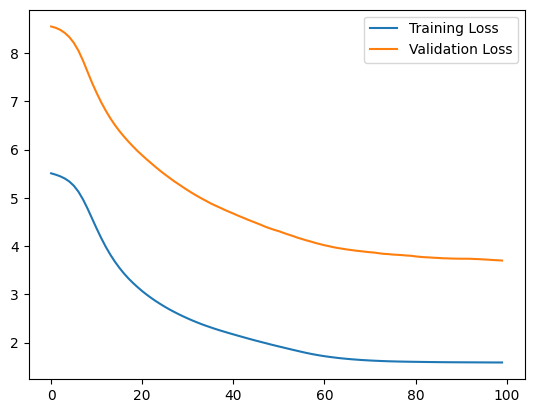

In [53]:
print(history.history["loss"])
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

In [54]:
recons_good_test_data=model.predict(X_norm_test)
norm_test_data_loss=tf.keras.losses.mae(recons_good_test_data,X_norm_test)

recons_anom_test_data=model.predict(X_anom_test)
anom_test_data_loss=tf.keras.losses.mae(recons_anom_test_data,X_anom_test)

norm_test_data_loss_mean=np.mean(norm_test_data_loss,axis=1)
anom_test_data_loss_mean=np.mean(anom_test_data_loss,axis=1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


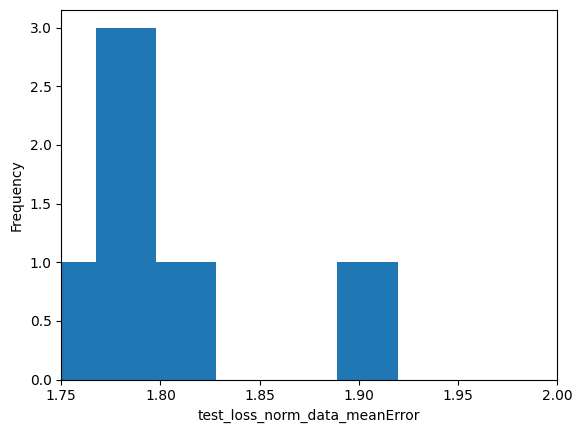

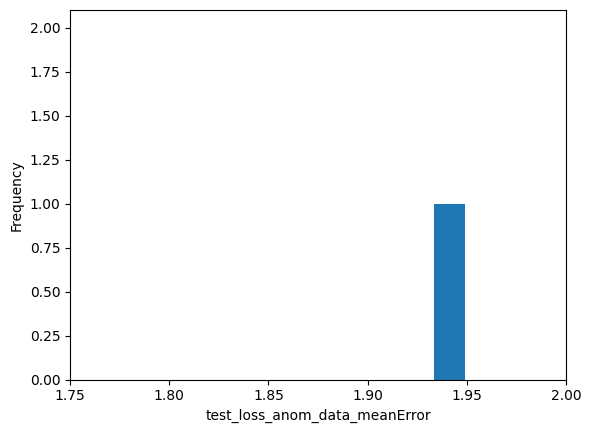

In [55]:
test_loss_norm_data_mean=np.mean(norm_test_data_loss,axis=1)
test_loss_anom_data_mean=np.mean(anom_test_data_loss,axis=1)

plt.hist(test_loss_norm_data_mean,bins=50)
plt.xlabel("test_loss_norm_data_meanError")
plt.ylabel("Frequency")
plt.xlim(1.75,2)
plt.show()


plt.hist(test_loss_anom_data_mean,bins=50)
plt.xlabel("test_loss_anom_data_meanError")
plt.ylabel("Frequency")
plt.xlim(1.75,2)
plt.show()

In [56]:
## predict the metrics for test data

def predict(model,data,threshold):
    recons_test_data=model.predict(data)
    data_loss=tf.keras.losses.mae(recons_test_data,data)
    data_loss_mean=tf.reduce_mean(data_loss,axis=1)
    # anomalous_data_indices=np.where(data_loss_mean>threshold)
    return tf.math.less(threshold,data_loss_mean)
# def print_stats(predcitions,labels):
#     print("Accuracy={} ".format(accuracy_score(labels,predictions)))
#     print("Precision={} ".format(precision_score(labels,predictions)))
#     print("Recall={} ".format(recall_score(labels,predictions)))

In [57]:
##set the threshold for identifying anomalies based on MAE for normal and anomalous data
threshold=1.9
# anomalous_data_indices=np.where(test_loss_anom_data_mean>threshold)
# print(anomalous_data_indices)

In [60]:
preds=predict(model,X_test,threshold)
preds.dtype
num_true=tf.cast(tf.math.count_nonzero(preds),tf.int32)
num_false=tf.cast(tf.size(preds)-num_true,tf.int32)
print("Number of anomalies detected: ",num_true.numpy())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Number of anomalies detected:  40


In [ ]:
# import sklearn.metrics as metrics
# from sklearn.metrics import accuracy_score,precision_score,recall_score
# preds=predict(model,X_test,threshold)
# preds.dtype
# num_true=tf.cast(tf.math.count_nonzero(preds),tf.int32)
# num_